# Descargar el archivo de Datos

In [ ]:
# Importa las bibliotecas necesarias
import os
import requests
import io

# Define la URL del archivo que deseas descargar
file_id = '1gTH_QigJSZlHjb6NQ_pgkLGpGpoXXix-'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Descarga el archivo
response = requests.get(url)
fh = io.BytesIO(response.content)

# Obtiene la ruta de la carpeta actual
current_dir = os.getcwd()

# Define el nombre del archivo descargado
filename = 'Datos_Bucaramanga.csv'

# Guarda el archivo descargado en la carpeta actual
with open(os.path.join(current_dir, filename), 'wb') as f:
    f.write(fh.getbuffer())

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

path_ai = "Inteligencia_Artificial" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive', force_remount=True)
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
Mounted at /content/drive
/content/drive/My Drive/Inteligencia_Artificial


# Librerias

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# La libreria de random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# libreria para super vector machine
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN

import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import concurrent.futures
from sklearn.decomposition import PCA


In [ ]:
def convertir_categoricos_numericos(df, columnas):
    medidas_Nombres = []
    valor_Numerico_Medida = []
    caracteristicas_count = []

    for columna in columnas:
        valores_unicos = df[columna].unique()

        if columna == "MEDIDA":
            medidas_Nombres.append(valores_unicos)

        for i in range(len(valores_unicos)):
            df[columna] = df[columna].replace([valores_unicos[i]], i)

            if columna == "MEDIDA":
                valor_Numerico_Medida.append(i)
                caracteristicas_count.append([columna, valores_unicos[i], df[df["MEDIDA"] == i].shape[0]])

    tabla_conversion = pd.DataFrame(caracteristicas_count, columns=["Caracteristica", "Valor_NO_Numerico", "Cantidad_Registros"])

    return df, tabla_conversion

In [ ]:
def convertir_categoricos_numericos_completa(df, columnas):
    import numpy as np
    import pandas as pd
    # Obtener la columna con la mayor cantidad de valores únicos
    columna_con_mas_valores = df.nunique().idxmax()

    # Mover la columna con más valores únicos al principio de la lista de columnas
    columnas.remove(columna_con_mas_valores)
    columnas.insert(0, columna_con_mas_valores)

    # Crear un dataframe vacío del tamaño del número máximo de valores únicos en una columna
    max_valores_unicos = df[columna_con_mas_valores].nunique()
    tabla_conversion = pd.DataFrame(index=np.arange(max_valores_unicos))

    for columna in columnas:
        # Valores únicos contiene los nombres únicos de las columnas
        valores_unicos = df[columna].unique()
        valor_numerico = np.linspace(0, len(valores_unicos) - 1, len(valores_unicos))
        # Reemplazar los valores únicos por valores numéricos
        for i in range(len(valores_unicos)):
            df[columna] = df[columna].replace([valores_unicos[i]], i)
        # Si el número de valores únicos en esta columna es menor que max_valores_unicos, rellenar con NaN
        if len(valores_unicos) < max_valores_unicos:
            valores_unicos = np.concatenate([valores_unicos, [np.nan] * (max_valores_unicos - len(valores_unicos))])
            valor_numerico = np.concatenate([valor_numerico, [np.nan] * (max_valores_unicos - len(valor_numerico))])

        tabla_conversion[columna] = valores_unicos
        tabla_conversion[columna + "_Numerico"] = valor_numerico

        if columna == "MEDIDA":
            # Calcular cuántos registros hay por cada valor de la columna
            caracteristicas_count = df[columna].value_counts()
            tabla_conversion['#Registros_Medida'] = np.concatenate([caracteristicas_count, [np.nan] * (max_valores_unicos - len(caracteristicas_count))])

    return df, tabla_conversion

In [ ]:
def eliminar_registros_un_registro(data):
    counts = data["MEDIDA"].value_counts()
    clases_un_registro = counts[counts <= 500].index
    data = data[~data["MEDIDA"].isin(clases_un_registro)]
    return data

In [ ]:
# Crear una instancia de SMOTE
df = pd.read_csv("/content/drive/MyDrive/Inteligencia_Artificial/DatosBucaramanga.csv")
df = df.dropna(axis=0)
data = df.loc[:,["EDAD", "NACIONALIDAD", "ARTICULO", "COMPORTAMIENTO", "SITIO", "RANGO_HORARIO", "LOCALIDAD", "BARRIO_HECHOS", "MEDIDA"]]
columns = ["NACIONALIDAD", "ARTICULO", "COMPORTAMIENTO", "SITIO", "RANGO_HORARIO", "LOCALIDAD", "BARRIO_HECHOS", "MEDIDA"]
data = eliminar_registros_un_registro(data)
data, tabla_Conversion = convertir_categoricos_numericos_completa(data, columns)


X = data.values[:,:-1]
y = data.values[:,-1]
# Crear una instancia de SMOTE
smote = ADASYN(random_state=0)
X_sm, y_sm = smote.fit_resample(X, y) # type: ignore




In [ ]:
import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def mutate_value(value, mutation_range, param_range):
    mutation = random.uniform(-mutation_range, mutation_range)
    mutated_value = value + mutation

    mutated_value = max(param_range[0], mutated_value)
    mutated_value = min(param_range[1], mutated_value)
    mutated_value = int(round(mutated_value))
    return mutated_value

def evaluate_individual(individual, X_train, X_val, y_train, y_val):
    for param, value in individual.items():
        individual[param] = int(round(value))
    clf = DecisionTreeClassifier(**individual)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    fitness = accuracy_score(y_val, y_pred)
    return fitness

def select_parents(population, fitness_scores, tournament_size):
    sorted_indices = sorted(range(len(population)), key=lambda idx: fitness_scores[idx], reverse=True)
    parents = []
    for _ in range(2):
        tournament = random.sample(sorted_indices[:tournament_size], tournament_size)
        best_fitness_idx = max(tournament, key=lambda idx: fitness_scores[idx])
        parents.append(population[best_fitness_idx])
    return parents

def crossover(parent1, parent2):
    child = {}
    point = random.randint(1, len(parent1) - 1)
    for idx, (param, value) in enumerate(parent1.items()):
        if idx < point:
            child[param] = parent1[param]
        else:
            child[param] = parent2[param]
    return child

def mutate(individual, mutation_range, parameters, generation, num_generations, probabilida_mutated):
    if probabilida_mutated < random.random():
        mutated_individual = {}
        for param, value in individual.items():
            param_range = parameters[param]
            adaptation_factor = 1.0 - (generation / num_generations)
            adapted_mutation_range = mutation_range * adaptation_factor
            mutated_value = mutate_value(value, adapted_mutation_range, param_range)
            mutated_individual[param] = mutated_value
    else:
        mutated_individual = individual
    return mutated_individual

def evaluate_population_custom(population, X_train, X_val, y_train, y_val):
    fitness_scores = [0] * len(population)
    for i, individual in enumerate(population):
        fitness = evaluate_individual(individual, X_train, X_val, y_train, y_val)
        fitness_scores[i] = fitness
    return fitness_scores

def genetic_algorithm(X_train, X_val, y_train, y_val, parameters, population_size, initial_mutation_range, final_mutation_range, tournament_size, num_generations, probabilida_mutated):
    # Inicializar la población aleatoriamente
    population = []
    for _ in range(population_size):
        individual = {}
        for param_name, param_range in parameters.items():
            param_value = random.uniform(param_range[0], param_range[1])
            individual[param_name] = param_value
        population.append(individual)

    # Calcular el factor de adaptación para la tasa de mutación
    mutation_adaptation_factor = (final_mutation_range - initial_mutation_range) / num_generations

    # Mejor individuo y mejor puntuación de fitness hasta el momento
    best_individual = None
    best_fitness = float('-inf')

    # Evolución de la población
    best_fitness_scores = []
    for generation in range(num_generations):
        print(f"Generation {generation + 1}/{num_generations}")

        # Calcular la tasa de mutación actual para esta generación
        current_mutation_range = initial_mutation_range + generation * mutation_adaptation_factor

        # Evaluar el fitness de cada individuo
        fitness_scores = evaluate_population_custom(population, X_train, X_val, y_train, y_val)

        # Seleccionar y reproducir los individuos más aptos
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = select_parents(population, fitness_scores, tournament_size)
            child = crossover(parent1, parent2)
            mutated_child = mutate(child, current_mutation_range, parameters, generation, num_generations, probabilida_mutated)
            new_population.append(mutated_child)

        # Reemplazar la población anterior con la nueva generación
        population = new_population

        # Registrar la mejor puntuación de fitness de esta generación
        best_generation_fitness = max(fitness_scores)
        best_fitness_scores.append(best_generation_fitness)

        # Obtener el índice del individuo con el mejor fitness en esta generación
        best_individual_idx = fitness_scores.index(best_generation_fitness)

        # Obtener el mejor individuo en esta generación
        best_individual_params = population[best_individual_idx]

        # Actualizar el mejor individuo global si corresponde
        if best_generation_fitness > best_fitness:
            best_individual = best_individual_params
            best_fitness = best_generation_fitness

        # Imprimir el progreso
        print(f"Generation {generation + 1}/{num_generations} - Best Fitness: {best_generation_fitness:.4f} - Best Params: {best_individual_params}")

    # Graficar la mejora del fitness a lo largo de las generaciones
    plt.plot(range(1, num_generations + 1), best_fitness_scores)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("Improvement of Fitness over Generations")
    plt.grid(True)
    plt.show()

    return best_individual


# Ahora puedes llamar a la función 'genetic_algorithm' con tus datos y parámetros específicos.
# Por ejemplo:
# best_hyperparameters = genetic_algorithm(X_train, X_val, y_train, y_val, parameters, population_size, mutation_range, tournament_size, num_generations)


Generation 1/10
Generation 1/10 - Best Fitness: 0.8264 - Best Params: {'max_depth': 981, 'min_samples_split': 187, 'min_samples_leaf': 100, 'max_features': 195}
Generation 2/10
Generation 2/10 - Best Fitness: 0.8549 - Best Params: {'max_depth': 644, 'min_samples_split': 2, 'min_samples_leaf': 95, 'max_features': 297}
Generation 3/10
Generation 3/10 - Best Fitness: 0.8551 - Best Params: {'max_depth': 629, 'min_samples_split': 2, 'min_samples_leaf': 75, 'max_features': 357}
Generation 4/10
Generation 4/10 - Best Fitness: 0.8550 - Best Params: {'max_depth': 684, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 405}
Generation 5/10
Generation 5/10 - Best Fitness: 0.8550 - Best Params: {'max_depth': 690, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 448}
Generation 6/10
Generation 6/10 - Best Fitness: 0.8549 - Best Params: {'max_depth': 721, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 422}
Generation 7/10
Generation 7/10 - Best Fitness: 0.8

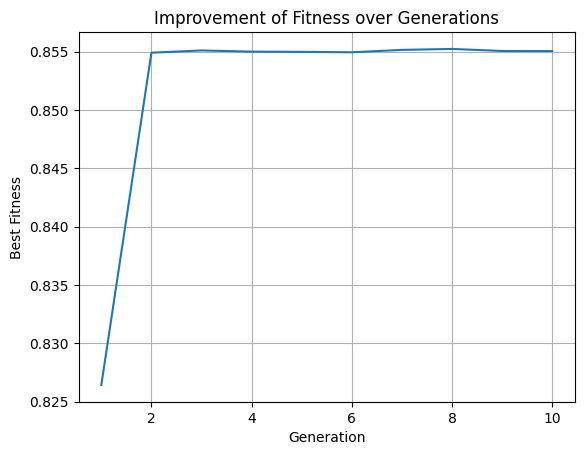

Mejor individuo encontrado:
{'max_depth': 683, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 400}


In [ ]:
# Ejemplo de uso
parameters = {
    'max_depth': (1, 1000),
    'min_samples_split': (2, 200),
    'min_samples_leaf': (1, 100),
    'max_features': (2, 1000)
}
DecisionTreeClassifier()
population_size = 50
initial_mutation_range = 200
final_mutation_range = 50
tournament_size = 20
num_generations = 10
probabilida_mutated = 0.6
# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Ejecutar el algoritmo genético
best_individual = genetic_algorithm(X_train, X_val, y_train, y_val, parameters, population_size, initial_mutation_range, final_mutation_range, tournament_size, num_generations, probabilida_mutated)


print("Mejor individuo encontrado:")
print(best_individual)

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       729
           1       0.49      0.48      0.48       738
           2       1.00      0.99      1.00       662
           3       0.70      0.68      0.69       678
           4       0.65      0.64      0.65       675
           5       0.53      0.48      0.50       664
           6       0.97      0.95      0.96       699
           7       0.83      0.85      0.84       681
           8       0.94      0.96      0.95       699
           9       0.92      0.95      0.94       684
          10       0.98      0.99      0.99       661
          11       0.99      1.00      0.99       704
          12       0.99      1.00      0.99       683

    accuracy                           0.82      8957
   macro avg       0.82      0.82      0.82      8957
weighted avg       0.82      0.82      0.82      8957



<BarContainer object of 3 artists>

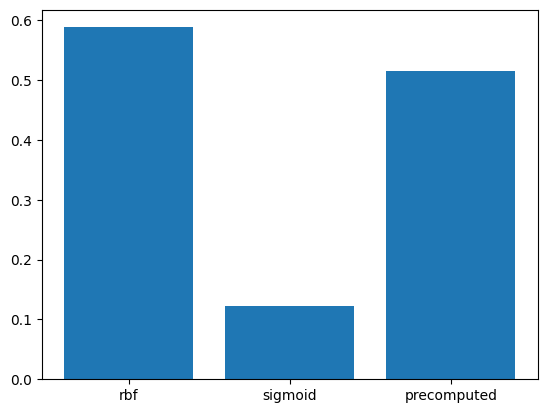

In [ ]:
#importar GaussianNB
best_individual = {'max_depth': 683, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 400}
est = DecisionTreeClassifier(**best_individual)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print(classification_report(y_test, y_pred))
n = 5
features = est.feature_importances_
bestfeat = np.argsort(features)[::-1][:n]


X_train_best = X_train[:,bestfeat]
X_test_best = X_test[:,bestfeat]
est1 = SVC(kernel='rbf')
est2 = SVC(kernel='sigmoid')
est3 = SVC(kernel='poly')
modelos = [est1, est2, est3]
scores = []
for modelo in modelos:
    modelo.fit(X_train_best, y_train)
    y_pred = modelo.predict(X_test_best)
    scores.append(accuracy_score(y_test, y_pred))

plt.bar(['rbf', 'sigmoid', 'poly'], scores)



In [ ]:
tabla_Conversion.head(10)

BARRIO_HECHOS  BARRIO_HECHOS_Numerico    NACIONALIDAD  \
0          SIN REGISTRO                     0.0        COLOMBIA   
1  ÁLVAREZ LAS AMÉRICAS                     1.0       VENEZUELA   
2      MEJORAS PÚBLICAS                     2.0            PERU   
3             LA AURORA                     3.0         FRANCIA   
4              EL PRADO                     4.0  ESTADOS UNIDOS   
5    CABECERA DEL LLANO                     5.0           HAITI   
6               ALARCÓN                     6.0         ECUADOR   
7                 GALÁN                     7.0          MEXICO   
8          LAS AMERICAS                     8.0         URUGUAY   
9             SOTOMAYOR                     9.0            CUBA   

   NACIONALIDAD_Numerico                                           ARTICULO  \
0                    0.0  Art. 27 - Comportamientos que ponen en riesgo ...   
1                    1.0  Art. 140 - Comportamientos contrarios al cuida...   
2                    2.0  Art. 35 - Comportamientos que afectan las rela...   
3                    3.0  Art. 34 - Comportamientos que afectan la convi...   
4                    4.0  Art. 92 - Comportamientos relacionados con el ...   
5                    5.0  Art. 30 - Comportamientos que afectan la segur...   
6                    6.0  Art. 38 - Comportamientos que afectan la integ...   
7                    7.0  Art. 33 - Comportamientos que afectan la tranq...   
8                    8.0  Art. 93 - Comportamientos relacionados con la ...   
9                    9.0  Art. 94 - Comportamientos relacionados con la ...   

   ARTICULO_Numerico                                     COMPORTAMIENTO  \
0                0.0  Num. 7 - Portar armas neumáticas, de aire, de ...   
1                1.0  Num. 11 - Realizar necesidades fisiológicas en...   
2                2.0  Num. 3 - Agredir físicamente a personas por cu...   
3                3.0   Num. 1 - Irrespetar a las autoridades de policía   
4                4.0  Num. 7 - Consumir sustancias prohibidas en est...   
5                5.0  Num. 2 - Incumplir, desacatar, desconocer e im...   
6                6.0  Num. 4 - Negarse a dar información veraz sobre...   
7                7.0  Num. 1 - Reñir, incitar o incurrir en confront...   
8                8.0  Num. 8 - Portar sustancias prohibidas en el es...   
9                9.0  Num. 3 - Impedir, dificultar, obstaculizar o r...   

   COMPORTAMIENTO_Numerico                                  SITIO  \
0                      0.0  SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO   
1                      1.0                              DOMICILIO   
2                      2.0                    MEDIO DE TRANSPORTE   
3                      3.0                              NO APLICA   
4                      4.0                                    NaN   
5                      5.0                                    NaN   
6                      6.0                                    NaN   
7                      7.0                                    NaN   
8                      8.0                                    NaN   
9                      9.0                                    NaN   

   SITIO_Numerico RANGO_HORARIO  RANGO_HORARIO_Numerico  \
0             0.0   17:00-17:59                     0.0   
1             1.0     0:00-0:59                     1.0   
2             2.0   19:00-19:59                     2.0   
3             3.0     1:00-1:59                     3.0   
4             NaN     4:00-4:59                     4.0   
5             NaN     5:00-5:59                     5.0   
6             NaN   14:00-14:59                     6.0   
7             NaN   16:00-16:59                     7.0   
8             NaN   23:00-23:59                     8.0   
9             NaN     8:00-8:59                     9.0   

                LOCALIDAD  LOCALIDAD_Numerico  \
0            SIN REGISTRO                 0.0   
1            13. ORIENTAL                 1.0   
2  12. CABECERA DEL

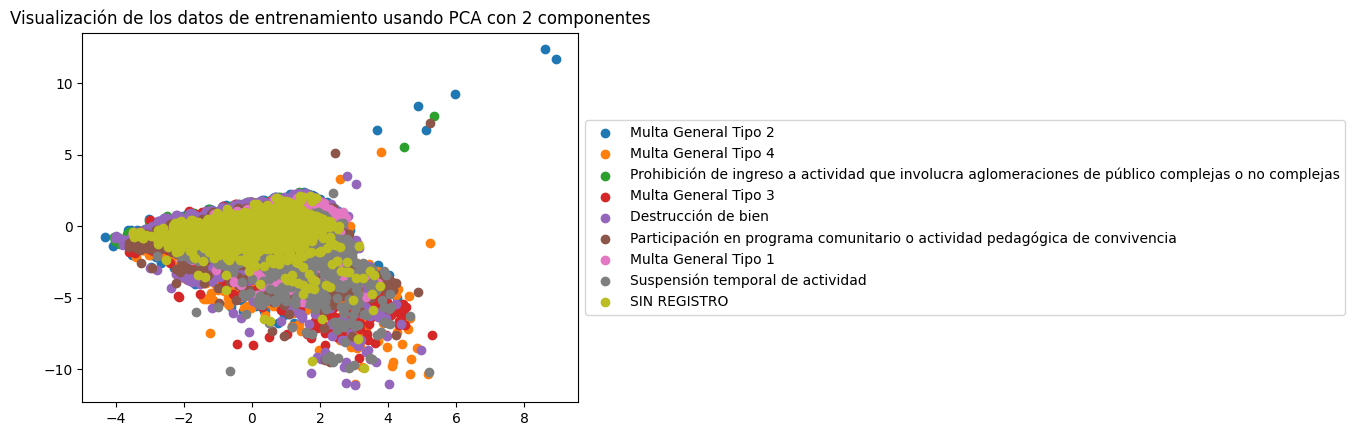

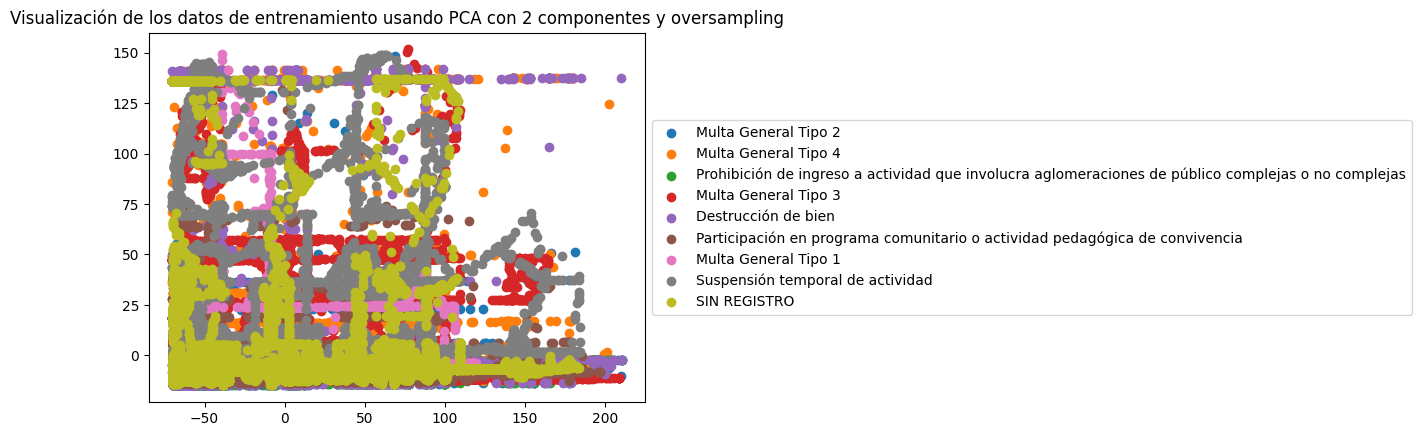

In [ ]:
#Usar un PCA para reducir la dimensionalidad y ver una grafica con una dimensionalidad de 2

pca = PCA(n_components=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
estandar = StandardScaler()

X_train = estandar.fit_transform(X_train)
X_test = estandar.transform(X_test)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#Pintar los puntos de y_train con colores diferentes y ver los nombres como leyenda usando el dataFrame tabla_conversion que
#guarda los nombres de las clases

fig, ax = plt.subplots()
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
           '#bcbd22', '#17becf', '#ff1493', '#00ff00', '#0000ff', '#ffff00', '#ff00ff', '#00ffff']
# Iterar sobre cada fila del DataFrame tabla_Conversion
for index, row in tabla_Conversion.iterrows():
    clase = row['MEDIDA']
    numero = row['MEDIDA_Numerico']
    # Obtener los índices de los puntos correspondientes a la clase actual
    if numero < 17:
        indices = np.where(y_train == numero)

        # Asignar un color único a la clase actual
        color = colores[index]  # Utilizar la paleta de colores tab20

        # Trazar los puntos correspondientes a la clase actual
        ax.scatter(X_train[indices, 0], X_train[indices, 1], color=color, label=clase)

# Mostrar una leyenda con los nombres de las clases
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Visualización de los datos de entrenamiento usando PCA con 2 componentes")

# Mostrar el gráfico
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#Pintar los puntos de y_train con colores diferentes y ver los nombres como leyenda usando el dataFrame tabla_conversion que
#guarda los nombres de las clases
n = len(data["MEDIDA"].unique())

fig, ax = plt.subplots()
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
           '#bcbd22', '#17becf', '#ff1493', '#00ff00', '#0000ff', '#ffff00', '#ff00ff', '#00ffff']
# Iterar sobre cada fila del DataFrame tabla_Conversion
for index, row in tabla_Conversion.iterrows():
    clase = row['MEDIDA']
    numero = row['MEDIDA_Numerico']
    # Obtener los índices de los puntos correspondientes a la clase actual
    if numero <= n:
        indices = np.where(y_train == numero)

        # Asignar un color único a la clase actual
        color = colores[index]  # Utilizar la paleta de colores tab20

        # Trazar los puntos correspondientes a la clase actual
        ax.scatter(X_train[indices, 0], X_train[indices, 1], color=color, label=clase)

# Mostrar una leyenda con los nombres de las clases
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Visualización de los datos de entrenamiento usando PCA con 2 componentes y oversampling")
# Mostrar el gráfico
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
estandar = StandardScaler()

X_train = estandar.fit_transform(X_train)
X_test = estandar.transform(X_test)

# Usar PCA con 2 componentes
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
# Crear coordenadas constantes para la tercera dimensión

# Crear figura 3D
fig = go.Figure(data=[go.Scatter3d(
    x=X_train_pca[:, 0],
    y=X_train_pca[:, 1],
    z=X_train_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=y_train,
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Configurar etiquetas de los ejes
fig.update_layout(scene=dict(
    xaxis_title='Componente Principal 1',
    yaxis_title='Componente Principal 2',
    zaxis_title='Dimensión adicional'
))

# Mostrar el gráfico interactivo
fig.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
print('Clasificador con oversampling')
est1 = DecisionTreeClassifier()
est1.fit(X_train, y_train)
y_pred = est1.predict(X_test)
print(classification_report(y_test, y_pred))
print('Clasificador sin oversampling')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
est2 = DecisionTreeClassifier()
est2.fit(X_train, y_train)
y_pred = est2.predict(X_test)
print(classification_report(y_test, y_pred))



Clasificador con oversampling
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      6801
           1       0.66      0.69      0.68      6670
           2       0.60      0.68      0.64      6490
           3       0.98      0.98      0.98      6872
           4       0.46      0.39      0.42      6468
           5       0.65      0.62      0.64      6616
           6       1.00      1.00      1.00      6866
           7       0.95      0.96      0.96      6778
           8       0.88      0.90      0.89      6746

    accuracy                           0.75     60307
   macro avg       0.74      0.75      0.74     60307
weighted avg       0.75      0.75      0.75     60307

Clasificador sin oversampling
              precision    recall  f1-score   support

           0       0.55      0.60      0.58      6876
           1       0.52      0.56      0.54      3442
           2       0.34      0.33      0.33      2731
           3      

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
estimators = [
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('Gaussian', GaussianNB()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('HistGradientBoostingClassifier', HistGradientBoostingClassifier()),
]
final_estimator = LogisticRegression(solver='newton-cg')

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.5, random_state=42)
estandar = StandardScaler()
X_train = estandar.fit_transform(X_train)
X_test = estandar.transform(X_test)
est = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.75      0.34      0.47     17080
           1       0.65      0.66      0.65     16429
           2       0.54      0.84      0.66     16140
           3       0.98      0.99      0.98     17150
           4       0.47      0.38      0.42     16191
           5       0.60      0.66      0.63     16619
           6       1.00      1.00      1.00     17152
           7       0.94      0.98      0.96     17015
           8       0.89      0.91      0.90     16990

    accuracy                           0.75    150766
   macro avg       0.76      0.75      0.74    150766
weighted avg       0.76      0.75      0.74    150766



C:\Users\Yeferson\AppData\Local\Temp\ipykernel_10452\676966254.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i,j].scatter(data_std.iloc[:,a], data_std['MEDIDA'], cmap='viridis')


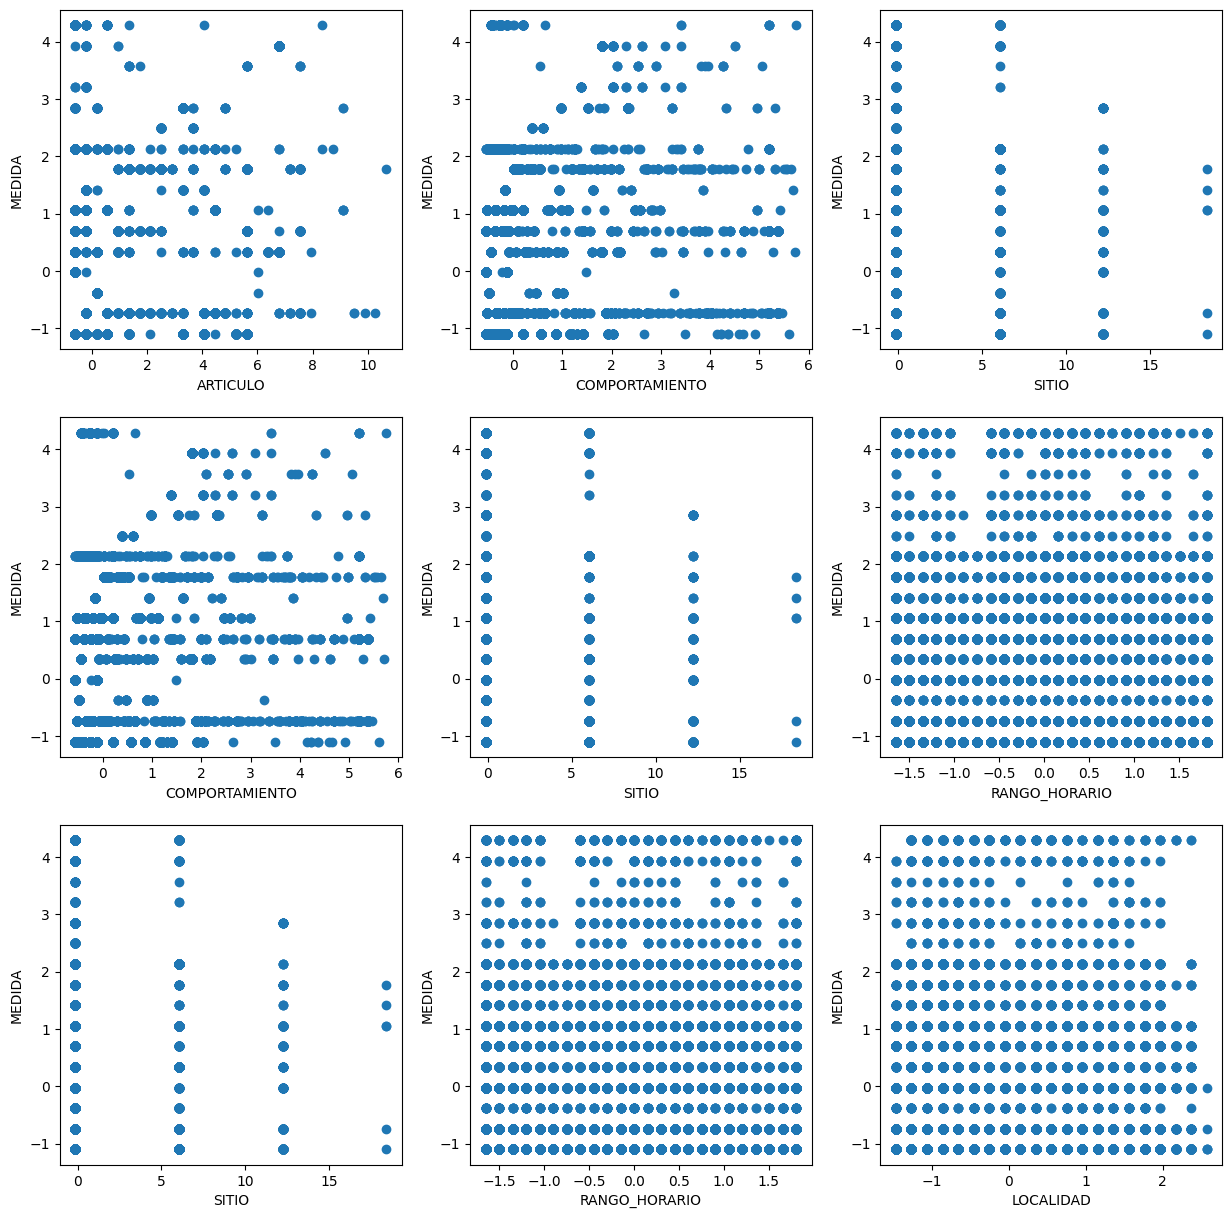

In [ ]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std = pd.DataFrame(data_std, columns=data.columns)
#Dibujar grafico de dispesion
fig, ax = plt.subplots(3,3,figsize=(15,15))
for i in range(3):
    a = i+1
    for j in range(3):
        a = a+1
        ax[i,j].scatter(data_std.iloc[:,a], data_std['MEDIDA'], cmap='viridis')
        ax[i,j].set_xlabel(data_std.columns[a])
        ax[i,j].set_ylabel(data_std.columns[8])

In [ ]:
#Usar el SVC con kernel rbf pero con los datos estandarizados
# est = DecisionTreeClassifier()
import tensorflow as tf
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.3)
est = DecisionTreeClassifier()
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print(classification_report(y_test, y_pred))
features = est.feature_importances_
bestfeat = np.argsort(features)[::-1][:3]


X_train_best = X_train[:,bestfeat]
X_test_best = X_test[:,bestfeat]
n = len(data["MEDIDA"].unique())
n = 30
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=n)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=n)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[X_train_best.shape[1]]),
    tf.keras.layers.Dense(256, activation=tf.nn.crelu),
    tf.keras.layers.Dense(128, activation=tf.nn.selu),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(n, activation=tf.nn.softmax)
])
model.summary()

# @title **code** Training a DNN
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',  # Cambiar la función de pérdida
              metrics=['accuracy'])

model.fit(X_train_best, y_train_ohe, epochs=5,batch_size=64,
          validation_data=(X_test_best, y_test_ohe))
test_loss, test_acc = model.evaluate(X_test_best, y_test_ohe)

print('Test accuracy:', test_acc)


              precision    recall  f1-score   support

           0       0.49      0.47      0.48     10310
           1       0.63      0.66      0.65      9536
           2       0.99      1.00      0.99     10306
           3       0.58      0.67      0.62      9678
           4       0.98      0.97      0.97     10274
           5       0.45      0.37      0.40      9642
           6       0.64      0.60      0.62      9925
           7       1.00      1.00      1.00      9968
           8       0.95      0.96      0.95     10308
           9       0.88      0.89      0.88     10368
          10       1.00      1.00      1.00     10008
          11       1.00      1.00      1.00     10313
          12       1.00      1.00      1.00     10046
          13       1.00      1.00      1.00     10295
          14       0.99      1.00      0.99     10145
          15       0.94      0.97      0.96     10209

    accuracy                           0.85    161331
   macro avg       0.84   

In [ ]:
a = random.randint(1,len(y_test)-1)
futures_individuo = X_test_best_std_pca[a].reshape(1, -1)
label_individuo = y_test[a].reshape(1, -1)
resultado = est1.predict(futures_individuo)
#Hacer la tranformacion con la tabla
nombres = tabla_Conversion['Valor_NO_Numerico'].values

print('El resultado esperado es: [' + (nombres[label_individuo]) + ']')
print('el resultado obtenido es: ['+ nombres[resultado]+']')

[['El resultado esperado es: [Disolución de reunión o actividad que involucra aglomeraciones de público no complejas]']]
['el resultado obtenido es: [Disolución de reunión o actividad que involucra aglomeraciones de público no complejas]']


In [ ]:
x = 0
for i in np.linspace(1,100,100):
    a = random.randint(1,len(y_test)-1)
    futures_individuo = X_test_best_std_pca[a].reshape(1, -1)
    label_individuo = y_test[a].reshape(1, -1)
    resultado = est1.predict(futures_individuo)
    #Hacer la tranformacion con la tabla
    nombres = tabla_Conversion['Valor_NO_Numerico'].values
    if label_individuo[0] == resultado[0]:
        x = x+1
print(x)

70
